# Titanic Passanger Survival Analysis

# Problem Statement
The sinking of the Titanic is one of the most infamous shipwrecks in history.
On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank
after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone on board,
resulting in the death of 1502 out of 2224 passengers and crew.
Use the Titanic dataset to build a model that predicts whether a passenger on the Titanic survived or
not. This is a classic beginner project with readily available data.
The dataset typically used for this project contains information about individual passengers, such as
their age, gender, ticket class, fare, cabin, and whether or not they survived.

In [1]:
from IPython.display import Image
Image(url= "https://www.pigeonforgetncabins.com/wp-content/uploads/2015/06/experience-at-titanic-pigeon-forge.jpg")

In [2]:
# import libraries
import warnings
warnings.simplefilter('ignore')
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# importing files
df = pd.read_csv('Titanic-Dataset.csv')

# Data Understanding

In [4]:
# show dimension of data sets
df.shape

(891, 12)

There are 891 rows and 12 columns in our datasets.

In [8]:
# show columns
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
# first five rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# last five rows
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


Checking the first 5 and last 5 rows of our entire dataset. We can see that our dataset comprises of total **891 rows and 12 columns.** The column **"Survived"** is our label that needs to be predicted survival chance of people in titanic ship. Apart from the **"Survived"** column right now all the remaining columns are our features that we will be using to generate our prediction. Since our label column is based upon binary classes this becomes a Classification problem!

In [9]:
# obtain the information of each columns.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We can see that currently there are 7 columns that have integer datatype and 5 columns that have object datatype. We will need to treat the object datatype columns so that our machine learning model can understand the data since the acceptance of numerical data is mandatory.

In [10]:
# identify number of unique value in each column.
df.nunique().to_frame("Unique Value")

,Unique Value
PassengerId,891
Survived,2
Pclass,3
Name,891
Sex,2
Age,88
SibSp,7
Parch,7
Ticket,681
Fare,248


We are checking the total number of unique values present in each column be it categorical or numerical data.

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [12]:
# checking the null value in each columns.
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There are 177, 687, 2 null values in columns **Age**,**Cabin**,**Embarked** respectively.

### Data Dictionary

* Survived: 0 = No, 1 = Yes
* pclass: Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
* sibsp: # of siblings / spouses aboard the Titanic
* parch: # of parents / children aboard the Titanic
* ticket: Ticket number
* cabin: Cabin number
* embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

**Total rows and columns**

We can see that there are 891 rows and 12 columns in our training dataset.

# Data Visualization

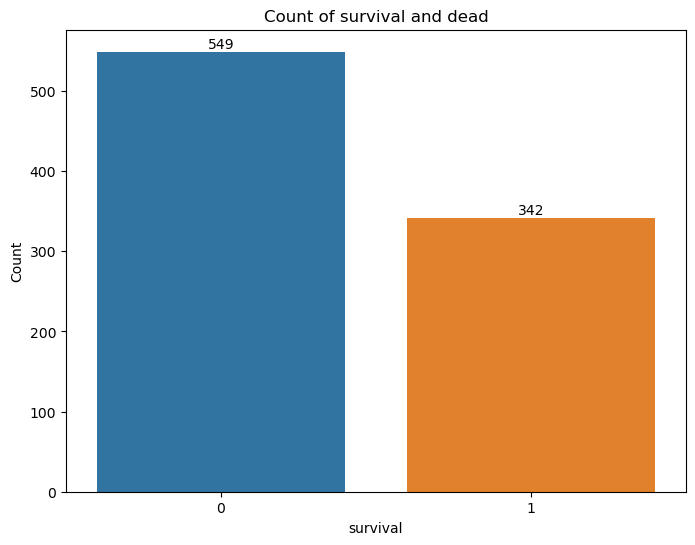

In [13]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x='Survived', data=df)
for x in ax.containers:
    ax.bar_label(x)
plt.title("Count of survival and dead")
plt.xlabel("survival")
plt.ylabel("Count")
plt.show()

In [14]:
def bar_chart(feature):
    survived = df[df['Survived']==1][feature].value_counts()
    dead = df[df['Survived']==0][feature].value_counts()
    a = pd.DataFrame([survived,dead])
    a.index = ['Survived','Dead']
    a.plot(kind='bar',stacked=True, figsize=(10,5))

Survived :
 female    233
male      109
Name: Sex, dtype: int64
Dead:
 male      468
female     81
Name: Sex, dtype: int64


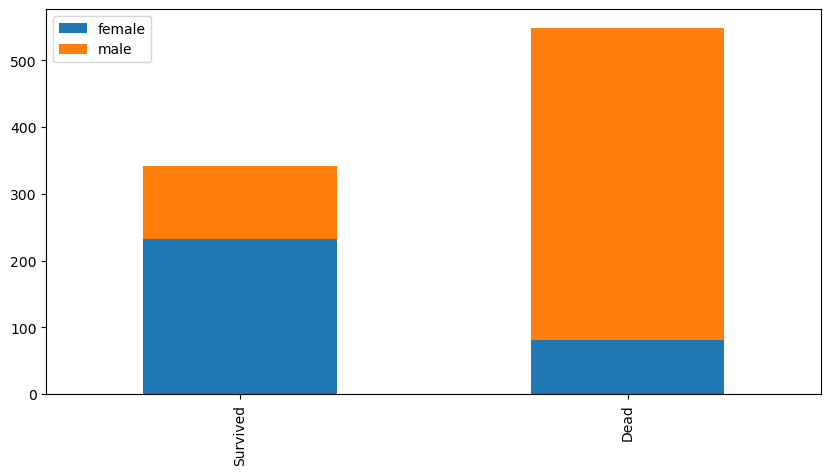

In [15]:
bar_chart('Sex')
print("Survived :\n",df[df['Survived']==1]['Sex'].value_counts())
print("Dead:\n",df[df['Survived']==0]['Sex'].value_counts())

The Chart confirms Women more likely survivied than Men.

Survived :
 1    136
3    119
2     87
Name: Pclass, dtype: int64
Dead:
 3    372
2     97
1     80
Name: Pclass, dtype: int64


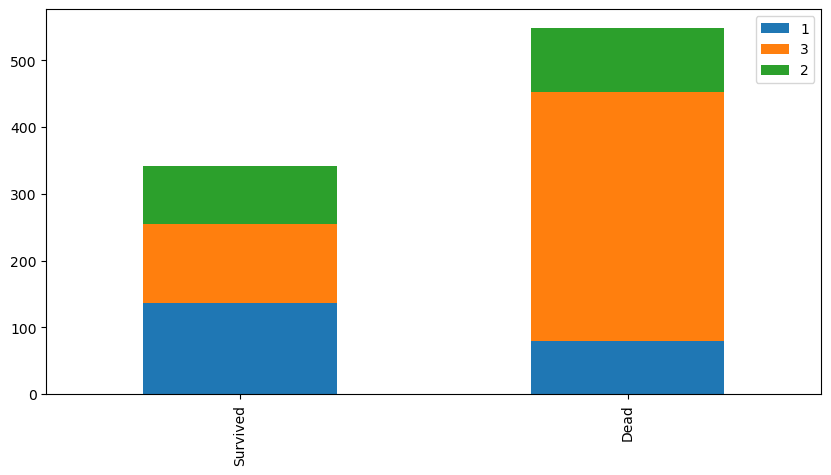

In [16]:
bar_chart('Pclass')
print("Survived :\n",df[df['Survived']==1]['Pclass'].value_counts())
print("Dead:\n",df[df['Survived']==0]['Pclass'].value_counts())

The Chart confirms 1st class more likely survivied than other classes.
The Chart confirms 3rd class more likely dead than other classes

Survived :
 0    210
1    112
2     13
3      4
4      3
Name: SibSp, dtype: int64
Dead:
 0    398
1     97
4     15
2     15
3     12
8      7
5      5
Name: SibSp, dtype: int64


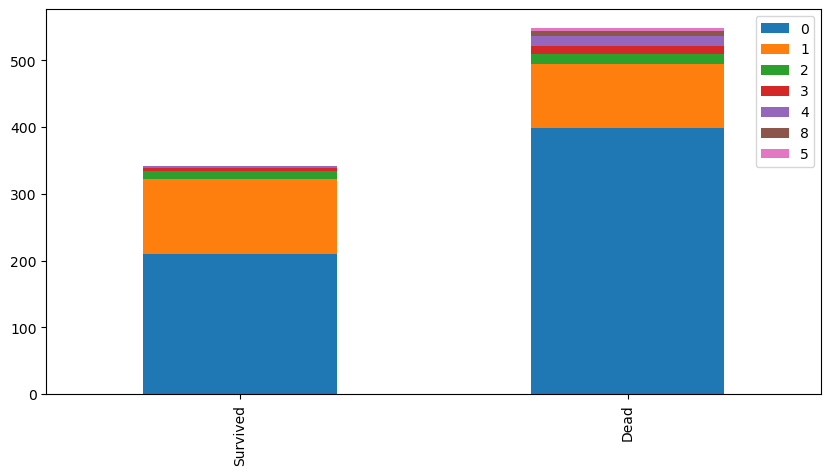

In [17]:
bar_chart('SibSp')
print("Survived :\n",df[df['Survived']==1]['SibSp'].value_counts())
print("Dead:\n",df[df['Survived']==0]['SibSp'].value_counts())

The Chart confirms a person aboarded with more than 2 siblings or spouse more likely survived.
The Chart confirms a person aboarded without siblings or spouse more likely dead

Survived :
 0    233
1     65
2     40
3      3
5      1
Name: Parch, dtype: int64
Dead:
 0    445
1     53
2     40
5      4
4      4
3      2
6      1
Name: Parch, dtype: int64


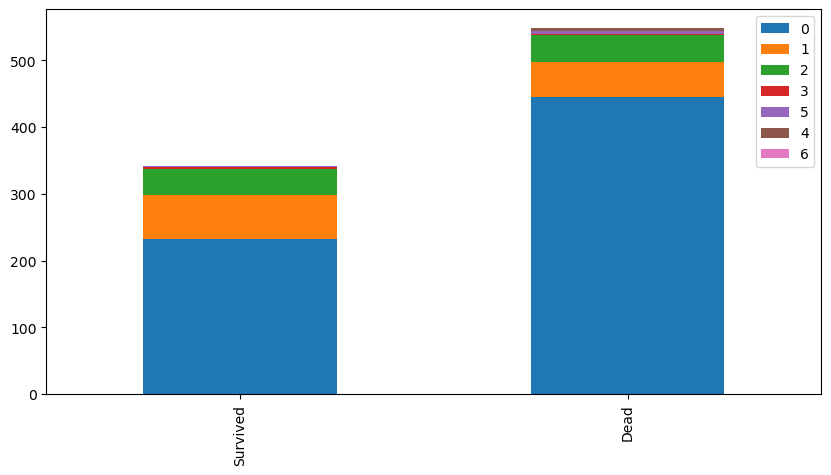

In [18]:
bar_chart('Parch')
print("Survived :\n",df[df['Survived']==1]['Parch'].value_counts())
print("Dead:\n",df[df['Survived']==0]['Parch'].value_counts())

The Chart confirms a person aboarded with more than 2 parents or children more likely survived.
The Chart confirms a person aboarded alone more likely dead

Survived :
 S    217
C     93
Q     30
Name: Embarked, dtype: int64
Dead:
 S    427
C     75
Q     47
Name: Embarked, dtype: int64


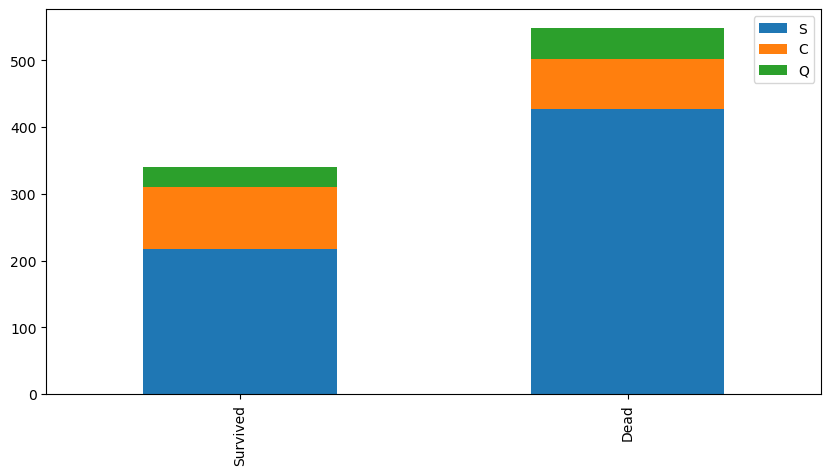

In [19]:
bar_chart('Embarked')
print("Survived :\n",df[df['Survived']==1]['Embarked'].value_counts())
print("Dead:\n",df[df['Survived']==0]['Embarked'].value_counts())

The Chart confirms a person aboarded from C slightly more likely survived.
The Chart confirms a person aboarded from Q more likely dead.
The Chart confirms a person aboarded from S more likely dead.

Survived :
 B96 B98    4
E101       3
F33        3
B18        2
B20        2
          ..
C32        1
E34        1
C7         1
C54        1
C148       1
Name: Cabin, Length: 101, dtype: int64
Dead:
 G6             2
C22 C26        2
C23 C25 C27    2
F G73          2
D26            2
              ..
C91            1
C2             1
T              1
C128           1
B51 B53 B55    1
Name: Cabin, Length: 62, dtype: int64


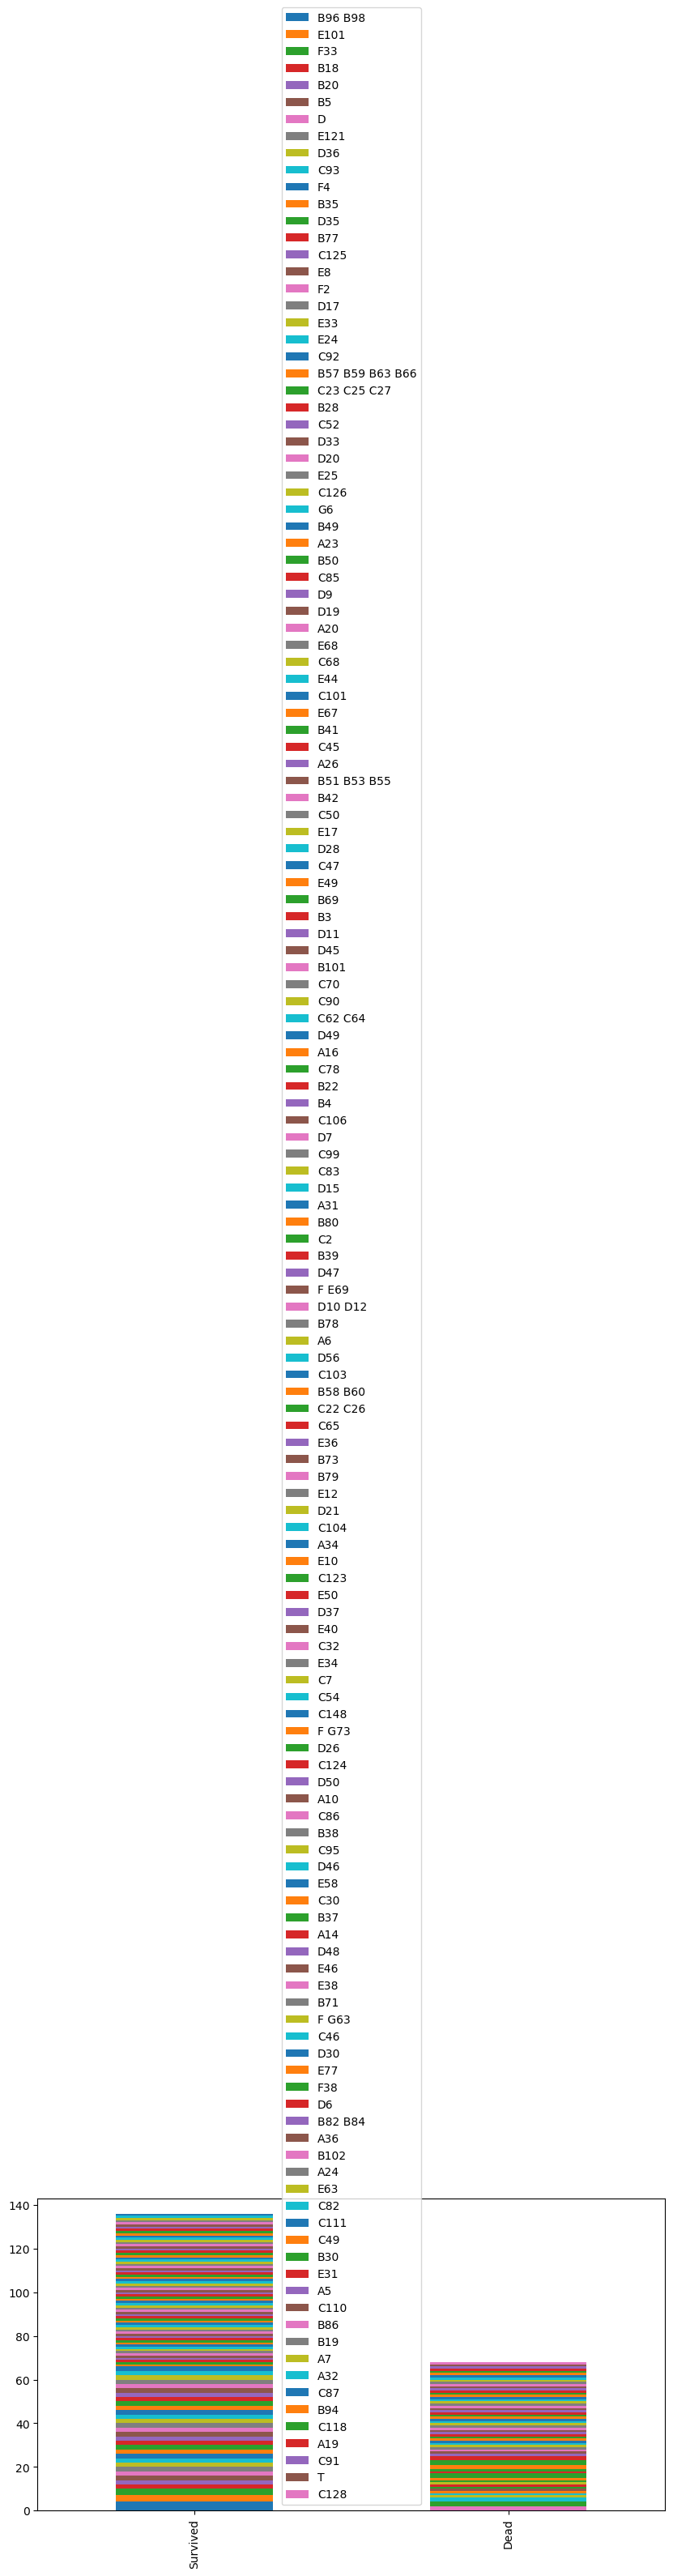

In [20]:
bar_chart('Cabin')
print("Survived :\n",df[df['Survived']==1]['Cabin'].value_counts())
print("Dead:\n",df[df['Survived']==0]['Cabin'].value_counts())

In [21]:
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/t/5090b249e4b047ba54dfd258/1351660113175/TItanic-Survival-Infographic.jpg?format=1500w")

# Data Preperation

In [22]:
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [23]:
df['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

#### Title Map
- Mr : 0
- Miss : 1
- Mrs: 2
- Others: 3

In [24]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }

df['Title'] = df["Title"].map(title_mapping)

In [25]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


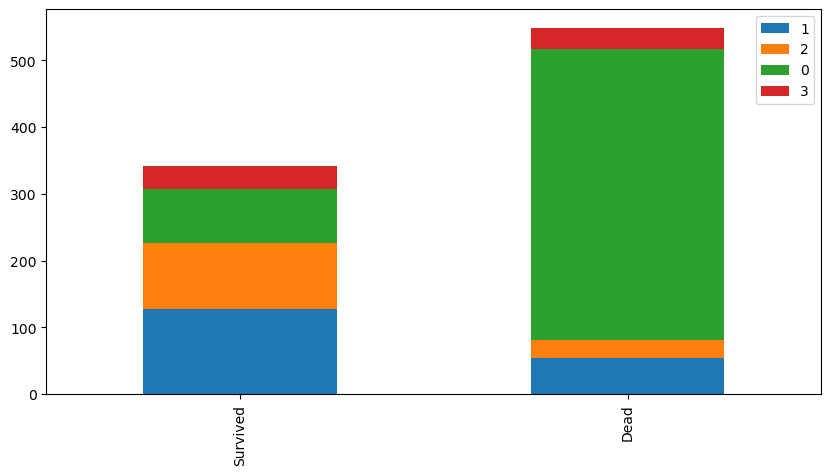

In [26]:
bar_chart('Title')

In [27]:
# delete unnecessary feature from dataset
df.drop('Name', axis=1, inplace=True)

In [28]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [29]:
sex_mapping = {"male": 0, "female": 1}
df['Sex'] = df['Sex'].map(sex_mapping)

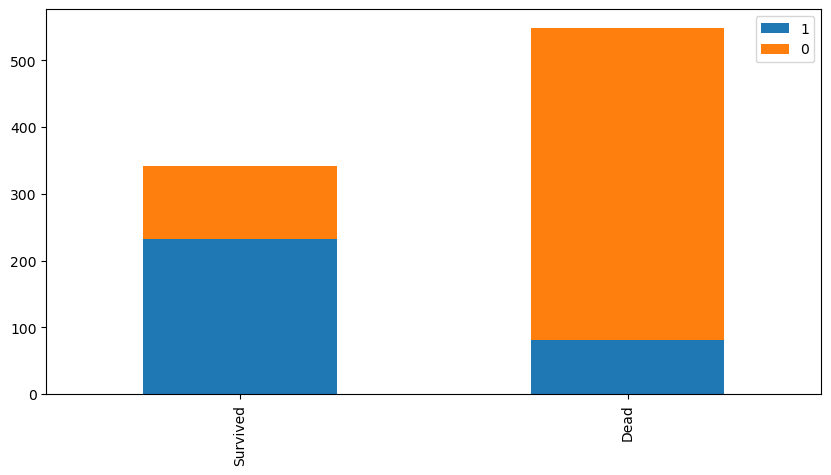

In [30]:
bar_chart('Sex')

In [31]:
# dealing with null value in age column.
df["Age"].fillna(df.groupby("Title")["Age"].transform("median"), inplace= True)

In [32]:
df.head(30)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,0,30.0,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,0,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,0,2.0,3,1,349909,21.0750,NaN,S,3
8,9,1,3,1,27.0,0,2,347742,11.1333,NaN,S,2
9,10,1,2,1,14.0,1,0,237736,30.0708,NaN,C,2


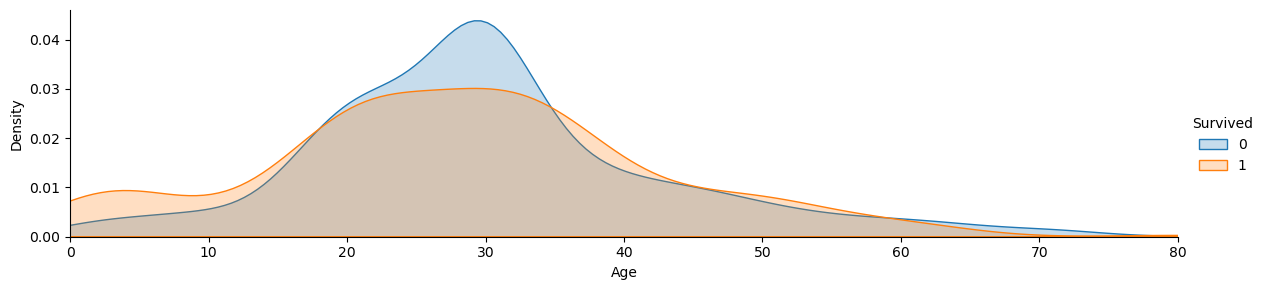

(10.0, 50.0)

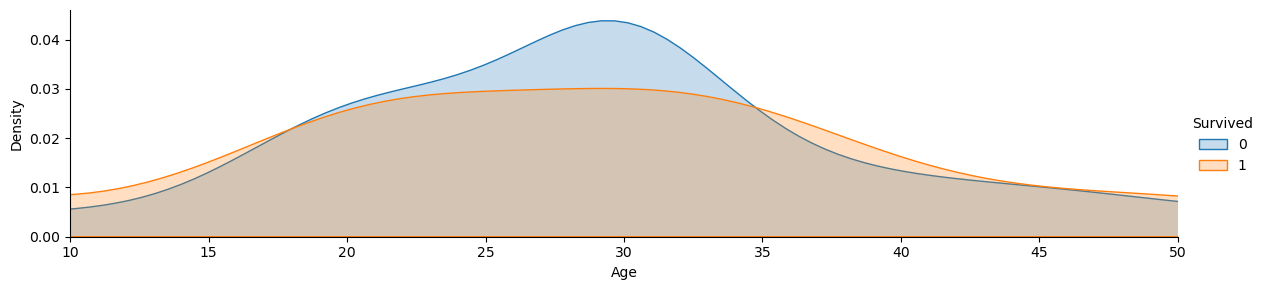

In [33]:
facet = sns.FacetGrid(df, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, df['Age'].max()))
facet.add_legend() 
plt.show()

facet = sns.FacetGrid(df, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, df['Age'].max()))
facet.add_legend() 
plt.xlim(10,50)

Those who were 20 to 30 years old were more dead and more survived.

**Binning**

Binning/Converting Numerical Age to Categorical Variable

feature vector map:
* child: 0
* young: 1
* adult: 2
* mid-age: 3
* senior: 4

In [34]:
df.loc[ df['Age'] <= 16, 'Age'] = 0,
df.loc[(df['Age'] > 16) & (df['Age'] <= 26), 'Age'] = 1,
df.loc[(df['Age'] > 26) & (df['Age'] <= 36), 'Age'] = 2,
df.loc[(df['Age'] > 36) & (df['Age'] <= 62), 'Age'] = 3,
df.loc[ df['Age'] > 62, 'Age'] = 4

ValueError: Must have equal len keys and value when setting with an iterable

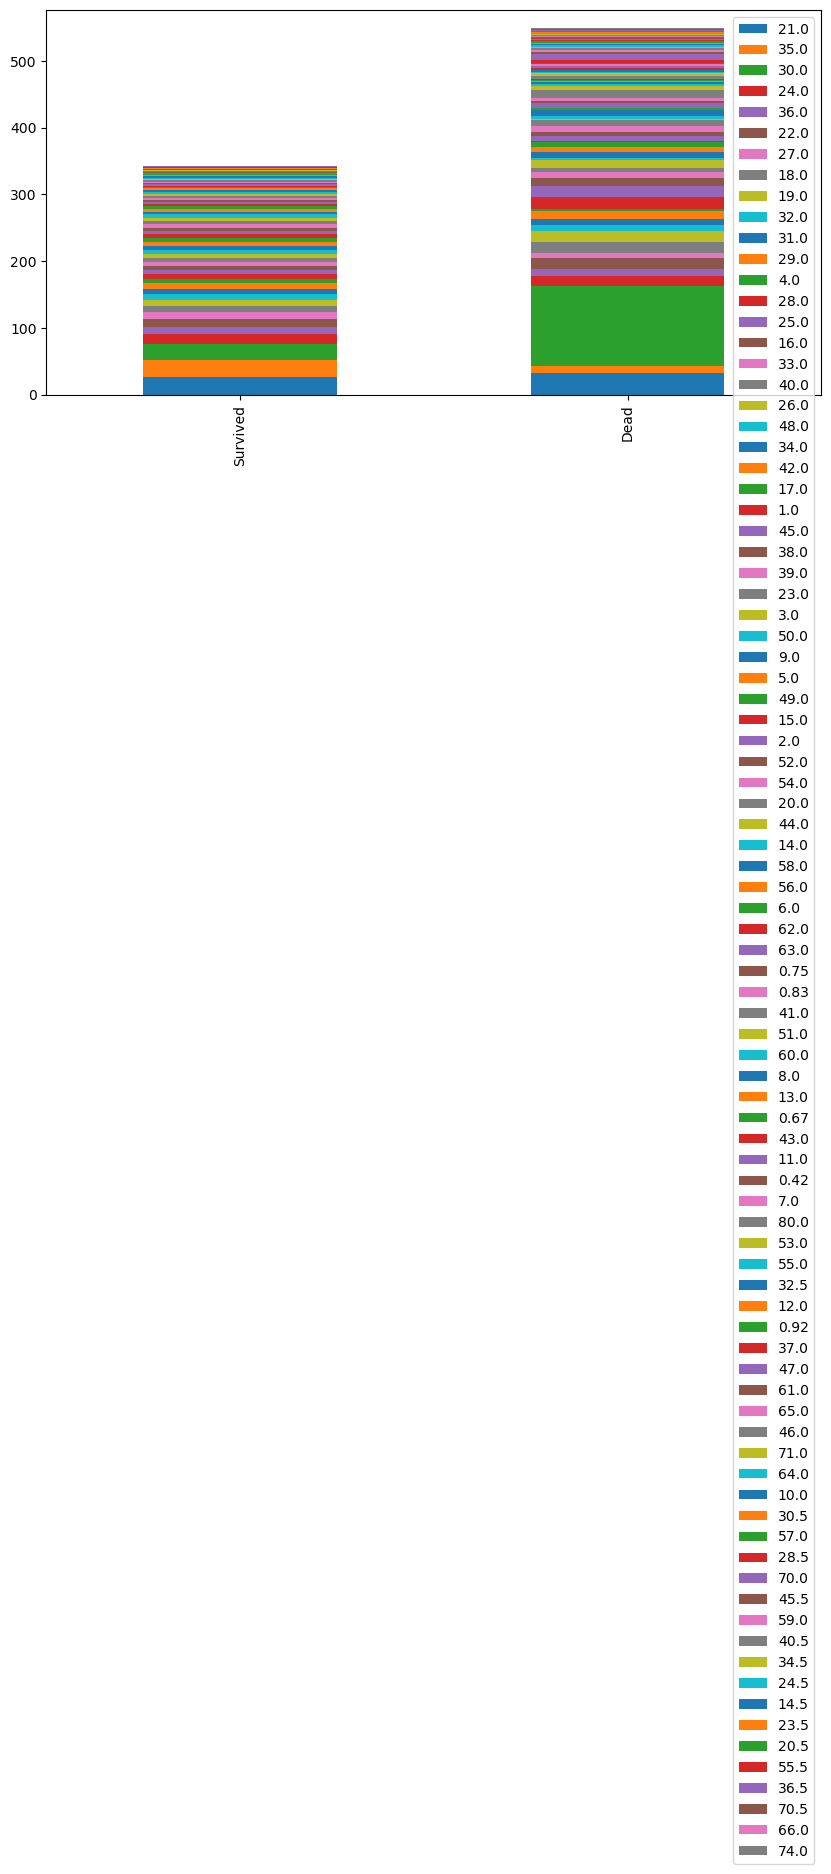

In [35]:
bar_chart('Age')

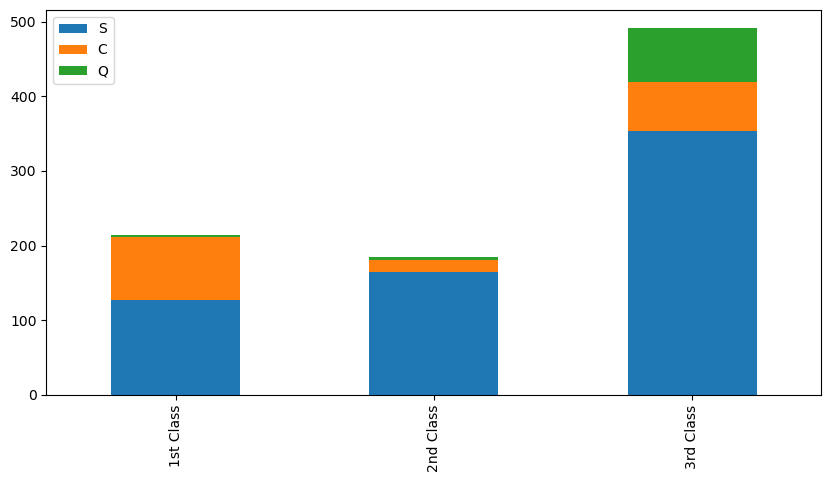

Pclass1:
 S    127
C     85
Q      2
Name: Embarked, dtype: int64
Pclass2:
 S    164
C     17
Q      3
Name: Embarked, dtype: int64
Pclass3:
 S    353
Q     72
C     66
Name: Embarked, dtype: int64


In [36]:
Pclass1 = df[df['Pclass'] == 1]['Embarked'].value_counts()
Pclass2 = df[df['Pclass'] == 2]['Embarked'].value_counts()
Pclass3 = df[df['Pclass'] == 3]['Embarked'].value_counts()
df1 = pd.DataFrame([Pclass1,Pclass2,Pclass3])
df1.index = ['1st Class','2nd Class','3rd Class']
df1.plot(kind = 'bar', stacked =  True, figsize=(10,5))
plt.show()
print("Pclass1:\n",Pclass1)
print("Pclass2:\n",Pclass2)
print("Pclass3:\n",Pclass3)

In [37]:
df['Embarked'] =  df['Embarked'].fillna('S')

In [38]:
embarked_mapping = {'S':0,'C':1,'Q':2}
df['Embarked'] = df['Embarked'].map(embarked_mapping)

In [39]:
# fill missing Fare with median fare for each Pclass
df["Fare"].fillna(df.groupby("Pclass")["Fare"].transform("median"), inplace=True)

In [40]:
df.head(40)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,0,0
5,6,0,3,0,30.0,0,0,330877,8.4583,NaN,2,0
6,7,0,1,0,54.0,0,0,17463,51.8625,E46,0,0
7,8,0,3,0,2.0,3,1,349909,21.0750,NaN,0,3
8,9,1,3,1,27.0,0,2,347742,11.1333,NaN,0,2
9,10,1,2,1,14.0,1,0,237736,30.0708,NaN,1,2


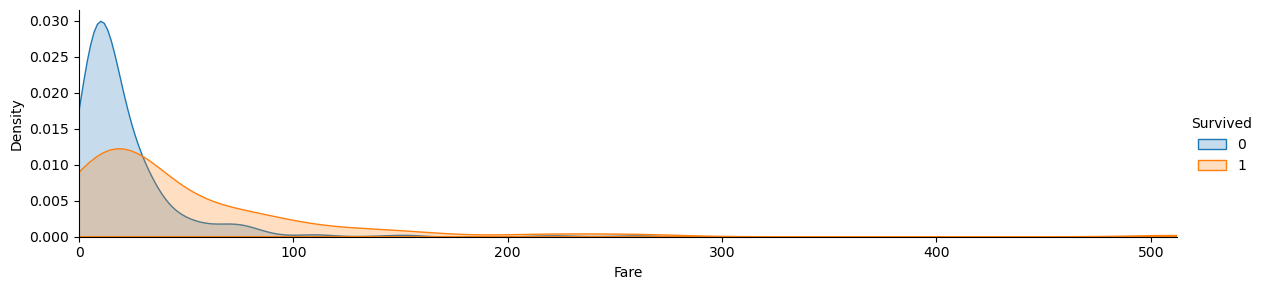

(0.0, 20.0)

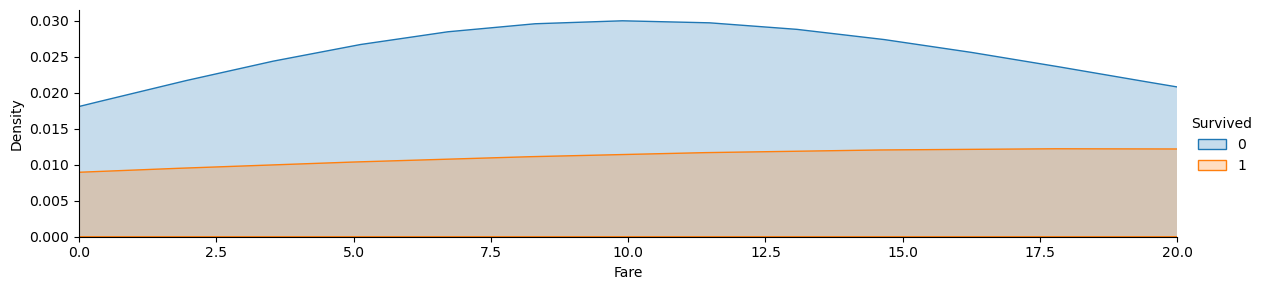

In [41]:
facet = sns.FacetGrid(df, hue="Survived",aspect=4 )
facet.map(sns.kdeplot, 'Fare', shade = True)
facet.set(xlim = (0, df['Fare'].max()))
facet.add_legend()
plt.show()

facet = sns.FacetGrid(df, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, df['Fare'].max()))
facet.add_legend()
plt.xlim(0, 20)

In [42]:
df.loc[df['Fare'] <= 17, 'Fare'] = 0,
df.loc[(df['Fare'] > 17) & (df['Fare'] <= 30), 'Fare'] = 1,
df.loc[(df['Fare'] > 30) & (df['Fare'] <= 100), 'Fare'] = 2,
df.loc[df['Fare'] >= 100, 'Fare'] = 3

ValueError: Must have equal len keys and value when setting with an iterable

In [43]:
df['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [44]:
df['Cabin'] =  df['Cabin'].str[:1]

<Axes: >

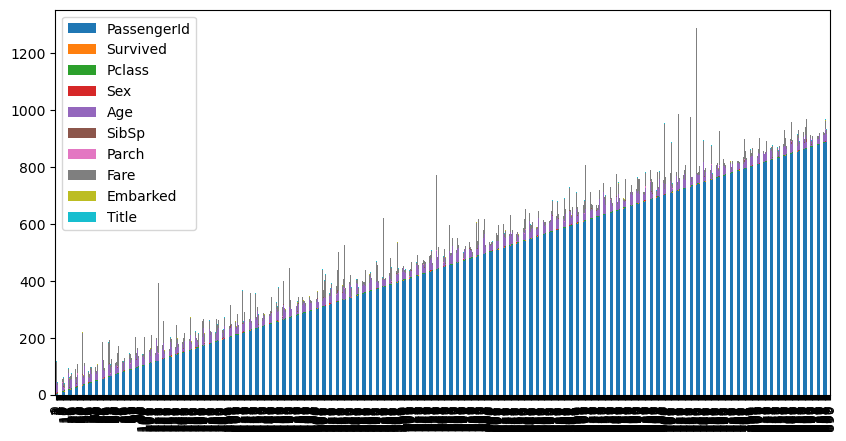

In [45]:
Pclass1 = df[df['Pclass']==1]['Cabin'].value_counts()
Pclass2 = df[df['Pclass']==2]['Cabin'].value_counts()
Pclass3 = df[df['Pclass']==3]['Cabin'].value_counts()
df2 = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df2.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [46]:
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
df['Cabin'] = df['Cabin'].map(cabin_mapping)

In [47]:
# fill missing Fare with median fare for each Pclass
df["Cabin"].fillna(df.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

In [48]:
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1

(0.0, 11.0)

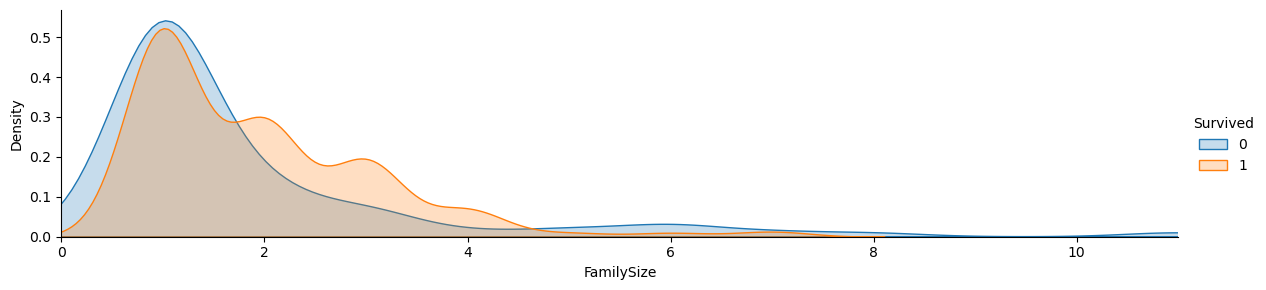

In [49]:
facet = sns.FacetGrid(df, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'FamilySize',shade= True)
facet.set(xlim=(0, df['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

In [50]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
df['FamilySize'] = df['FamilySize'].map(family_mapping)

In [51]:
df.head(30)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,2.0,0,0,0.4
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,0.8,1,2,0.4
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,2.0,0,1,0.0
3,4,1,1,1,35.0,1,0,113803,53.1000,0.8,0,2,0.4
4,5,0,3,0,35.0,0,0,373450,8.0500,2.0,0,0,0.0
5,6,0,3,0,30.0,0,0,330877,8.4583,2.0,2,0,0.0
6,7,0,1,0,54.0,0,0,17463,51.8625,1.6,0,0,0.0
7,8,0,3,0,2.0,3,1,349909,21.0750,2.0,0,3,1.6
8,9,1,3,1,27.0,0,2,347742,11.1333,2.0,0,2,0.8
9,10,1,2,1,14.0,1,0,237736,30.0708,1.8,1,2,0.4


In [52]:
features_drop = ['Ticket','SibSp','Parch','PassengerId']
df = df.drop(features_drop, axis = 1)

In [53]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,0,3,0,22.0,7.2500,2.0,0,0,0.4
1,1,1,1,38.0,71.2833,0.8,1,2,0.4
2,1,3,1,26.0,7.9250,2.0,0,1,0.0
3,1,1,1,35.0,53.1000,0.8,0,2,0.4
4,0,3,0,35.0,8.0500,2.0,0,0,0.0


# Modelling

In [54]:
# Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [55]:
X = df.drop('Survived', axis=1)
Y = df['Survived']

In [56]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.25, random_state=0)

In [57]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [58]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, X_train, Y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.70149254 0.64179104 0.70149254 0.71641791 0.7761194  0.62686567
 0.68656716 0.74626866 0.59090909 0.74242424]


In [59]:
#learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
clf = [KNeighborsClassifier(n_neighbors = 13),DecisionTreeClassifier(),
       RandomForestClassifier(n_estimators=13),GaussianNB(),SVC(),ExtraTreeClassifier(),
      GradientBoostingClassifier(n_estimators=10, learning_rate=1,max_features=3, max_depth =3, random_state = 10),AdaBoostClassifier(),ExtraTreesClassifier()]
def model_fit():
    scoring = 'accuracy'
    for i in range(len(clf)):
        score = cross_val_score(clf[i], X_train, Y_train, cv=k_fold, n_jobs=1, scoring=scoring)
        print("Score of Model",i,":",round(np.mean(score)*100,2))
#     round(np.mean(score)*100,2)
#     print("Score of :\n",score)
model_fit()

Score of Model 0 : 69.3
Score of Model 1 : 77.68
Score of Model 2 : 80.08
Score of Model 3 : 79.64
Score of Model 4 : 65.57
Score of Model 5 : 75.58
Score of Model 6 : 80.24
Score of Model 7 : 81.74
Score of Model 8 : 79.03


In [60]:
clf1 = SVC()
clf1.fit(X_train, Y_train)
prediction = clf1.predict(X_test)
# test_data

In [61]:
from IPython.display import Image
Image(url="https://t4.ftcdn.net/jpg/05/05/39/07/360_F_505390776_8ilykzGiVSpIjUqdEXFhDY1ACRJZPDRD.jpg")